In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [5]:
fear_greed = pd.read_csv("/content/drive/MyDrive/fear_greed.csv")
trades = pd.read_csv("/content/drive/MyDrive/trades.csv")

print("Fear-Greed shape:", fear_greed.shape)
print("Trades shape:", trades.shape)


Fear-Greed shape: (2644, 4)
Trades shape: (211224, 16)


In [6]:
print("Fear & Greed columns:")
print(fear_greed.columns.tolist())

print("\nTrader data columns:")
print(trades.columns.tolist())


Fear & Greed columns:
['timestamp', 'value', 'classification', 'date']

Trader data columns:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [32]:
# Normalize column names
fear_greed.columns = fear_greed.columns.str.strip()

# Identify date column
fg_date_col = [c for c in fear_greed.columns if "date" in c.lower()][0]

fear_greed[fg_date_col] = pd.to_datetime(fear_greed[fg_date_col], errors="coerce")
fear_greed.rename(columns={fg_date_col: "Date"}, inplace=True)

# Normalize sentiment labels
fear_greed["classification"] = fear_greed["classification"].str.strip().str.capitalize()

fear_greed.head()


,timestamp,value,classification,Date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme fear,2018-02-04
4,1517808600,11,Extreme fear,2018-02-05


In [9]:
# Normalize column names
trades.columns = trades.columns.str.strip()

# Identify time column safely
time_col = None
for col in trades.columns:
    if "time" in col.lower() or "date" in col.lower():
        time_col = col
        break

print("Detected time column:", time_col)

# Convert to datetime
trades[time_col] = pd.to_datetime(trades[time_col], errors="coerce")

# Create merge date
trades["date"] = trades[time_col].dt.date
trades["date"] = pd.to_datetime(trades["date"])

trades.head()


Detected time column: Timestamp IST


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12


In [10]:
merged = trades.merge(
    fear_greed,
    left_on="date",
    right_on="Date",
    how="inner"
)

print("Merged shape:", merged.shape)
merged.head()


Merged shape: (35864, 21)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed,2024-02-12


In [18]:
merged["is_profitable"] = merged["Closed PnL"] > 0
merged["abs_trade_size"] = merged["Size USD"].abs()


In [22]:
summary = merged.groupby("classification").agg(
    avg_pnl=("Closed PnL", "mean"),
    median_pnl=("Closed PnL", "median"),
    avg_trade_size=("abs_trade_size", "mean"),
    pnl_volatility=("Closed PnL", "std"),
    win_rate=("is_profitable", "mean"),
    trade_count=("Closed PnL", "count")
).reset_index()

summary


,classification,avg_pnl,median_pnl,avg_trade_size,pnl_volatility,win_rate,trade_count
0,Extreme fear,1.891632,0.00000,4118.761840,76.727713,0.292777,2326
1,Extreme greed,205.816345,0.96048,3242.085086,1861.557119,0.553282,5621
2,Fear,128.287950,0.00000,5744.782685,1342.348497,0.381787,13869
3,Greed,53.988003,0.00000,5051.878829,1399.468182,0.435707,11292
4,Neutral,27.088803,0.00000,4332.202906,142.945889,0.494920,2756


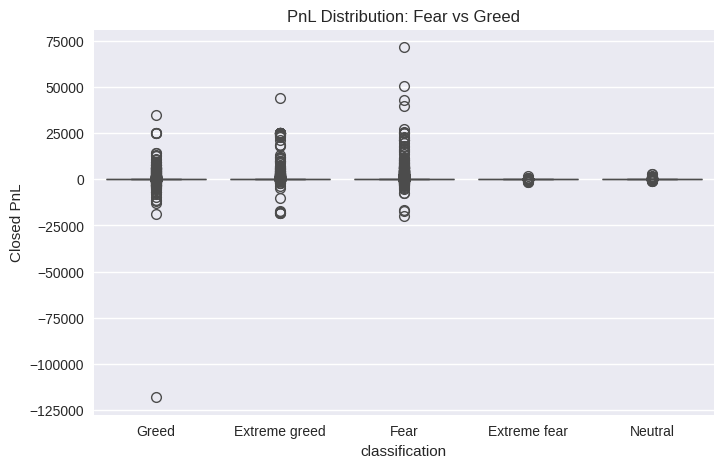

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x="classification", y="Closed PnL")
plt.title("PnL Distribution: Fear vs Greed")
plt.show()


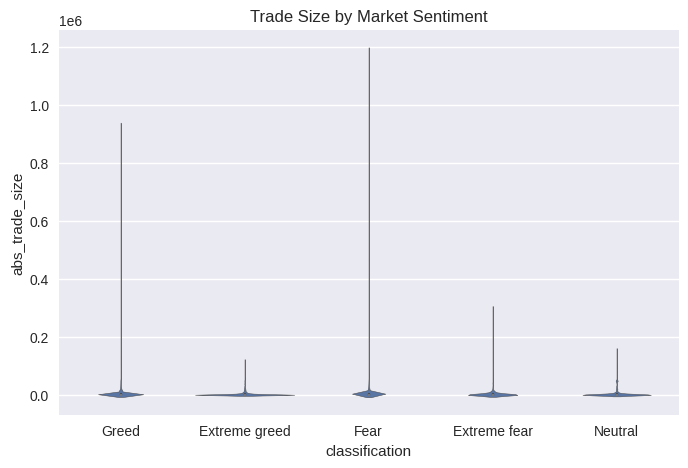

In [25]:
plt.figure(figsize=(8,5))
sns.violinplot(data=merged, x="classification", y="abs_trade_size")
plt.title("Trade Size by Market Sentiment")
plt.show()


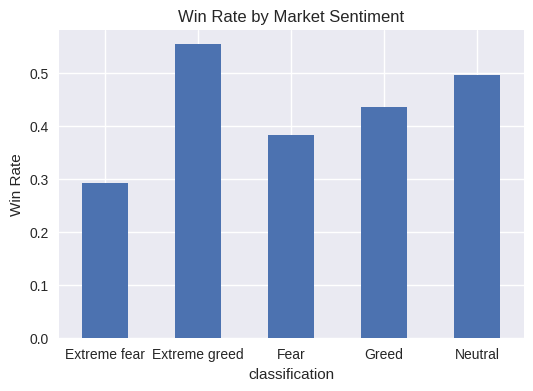

In [26]:
merged.groupby("classification")["is_profitable"].mean().plot(
    kind="bar", figsize=(6,4)
)
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.xticks(rotation=0)
plt.show()


In [28]:
large_trades = merged[merged["abs_trade_size"] > merged["abs_trade_size"].quantile(0.75)]

large_trades.groupby("classification")["Closed PnL"].mean()


,Closed PnL
classification,
Extreme fear,3.672495
Extreme greed,747.223309
Fear,468.140761
Greed,160.949012
Neutral,92.262215


In [30]:
summary.to_csv("sentiment_summary.csv", index=False)

plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x="classification", y="Closed PnL")
plt.title("PnL Distribution")
plt.savefig("pnl_distribution.png")
plt.close()
